In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import flywheel 
fw = flywheel.Client() 
collection_id = '5eb5081448fe1b1e5792a7a9' 
sessions = [fw.get_session(x.id) for x in fw.get_collection_sessions(collection_id)] 

## What's on Flywheel?

In [56]:
groups = []
for ses in sessions:  
    group_id = ses.parents['group']  
    group = fw.get(group_id)  
    groups.append(group.label) 
print("Done")

Done


In [57]:
group_list = list(set(groups))
n_list = []
for g in group_list:
    n_list.append(groups.count(g))
    print("{}: {}".format(g, groups.count(g)))

Connectome: 43
Penn FTD Center: 447
Davis Group: 16
David Wolk Lab: 205
Detre Group: 62
Oathes Lab: 95


# Calculate metadata
_______________________________________________________________________________________________


#### Setup

In [23]:
df = pd.read_csv('../metadata.csv')

### Calculate % Female for each group

In [27]:
sex_dict = {}
for group in group_list:
    group_df = df[df['Group'] == group]
    group_sex_series = group_df['Sex']
    breakdown = group_sex_series.value_counts()
    # calculate
    n_fems = breakdown['Female']
    n_total = len(group_sex_series)
    sex_dict[group] = (n_fems/n_total)*100

sex_df = pd.DataFrame.from_dict(sex_dict, orient='index', columns=['% Female'])

### Calculate mean and sd of age for each group

In [35]:
mean_dict = {}
n_list = []
for group in group_list:
    group_df = df[df['Group'] == group]
    n_list.append(len(group_df)) # add the number of subjects in group to an ordered list
    group_age_series = group_df['Age']
    #calculate
    group_age_series.dropna(inplace=True)
    mean = np.mean(group_age_series.to_numpy(dtype='float32'))
    sd = np.std(group_age_series.to_numpy(dtype='float32'))
    values = [mean, sd]
    mean_dict[group] = values
    
mean_df = pd.DataFrame.from_dict(mean_dict, orient='index', columns = ['Age (mean)','Age (sd)'])

In [36]:
big_df = mean_df
big_df['% Female'] = sex_df['% Female']
big_df['N'] = n_list
big_df.to_csv('../data_collection/accounting_summary.csv')

# Plot histogram
_______________________________________________________________________________________________


In [37]:
df_noftdc = df[df.Group != 'Penn FTD Center']

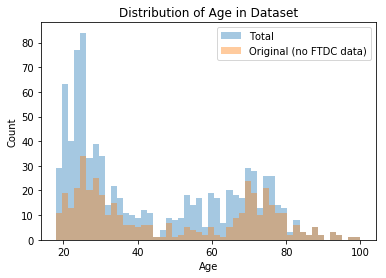

In [55]:
f, ax = plt.subplots()
ax = sns.distplot(df["Age"], norm_hist=False, bins=50, kde=False, label="Total")
ax = sns.distplot(df_noftdc["Age"], norm_hist=False, bins=50, kde=False, label="Original (no FTDC data)")
ax.set_ylabel('Count')
ax.set_title('Distribution of Age in Dataset')
ax.legend()
f.savefig('../data_collection/age_distribution.png')